In [10]:
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [11]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [12]:
df = pd.read_csv('/content/fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


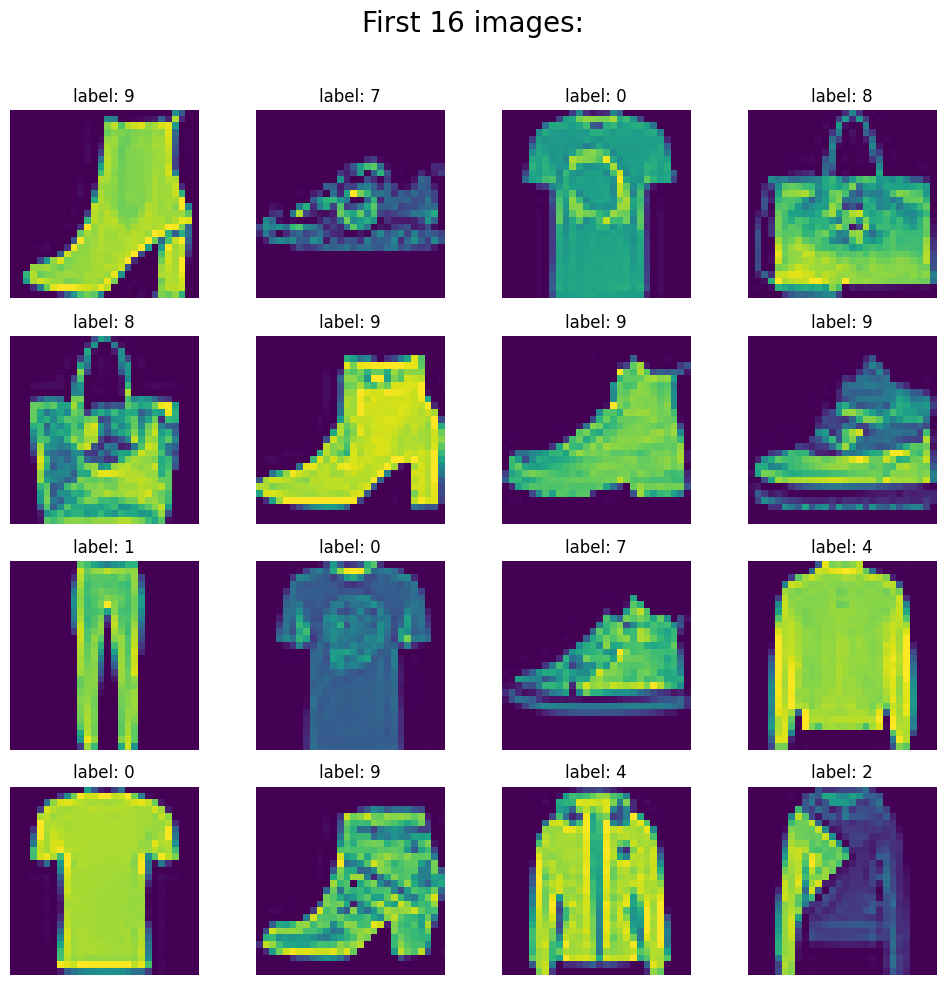

In [16]:
#create the 4x4 grid images
fig, axe = plt.subplots(4,4, figsize=(10,10))
fig.suptitle("First 16 images:", fontsize = 20)

#Plot the first 16 images from the dataset
for i, ax in enumerate(axe.flat):
  img = df.iloc[i, 1:].values.reshape(28, 28) #Reshape to 28x28
  ax.imshow(img) #Dispalay the grayscale
  ax.axis('off') #Remove axis for the cleaner look
  ax.set_title(f"label: {df.iloc[i, 0]}") #show thw label

plt.tight_layout(rect = [0, 0, 1, 0.96]) #adjust the layout to fit the title
plt.show()

In [17]:
#train test split

X = df.iloc [:, 1:].values
y = df.iloc [:, 0].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [19]:
X_train

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 16,  0,  0]])

In [22]:
y_train

array([7, 6, 7, ..., 0, 8, 6])

In [23]:
#scaling the features
X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [28]:
#Create customDataeset class

class customDataeset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype = torch.float32)
    self.labels = torch.tensor(labels, dtype = torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [29]:
#create train_dataset object
train_dataset = customDataeset(X_train, y_train)

In [31]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [32]:
#create test_dataset object
test_dataset = customDataeset(X_test, y_test)

In [34]:
test_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [35]:
#create train and test loader
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle=False)

In [43]:
#Define NN Class
class MyNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128), #input 12
        nn.ReLU(), #Activation function
        nn.Linear(128, 64), #128 layer to 64
        nn.ReLU(),
        nn.Linear(64, 10) #64 layer to 10 output
    )

  def forward(self, x):
    return self.model(x)

In [44]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [46]:
#instatiate the model
model = MyNN(X_train.shape[1])

#loss function
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [47]:
len(train_loader)

150

In [50]:
#traning loop
for epoch in range(epochs):
  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    #forward pass
    outputs = model(batch_features)

    #loss calculation
    loss = criterion(outputs, batch_labels)

    #back pass
    optimizer.zero_grad()
    loss.backward()

    #update weights
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1}, Loss: {avg_loss}')

Epoch: 1, Loss: 0.00029969201748220563
Epoch: 2, Loss: 0.000297859866162374
Epoch: 3, Loss: 0.00029466639998039073
Epoch: 4, Loss: 0.0002916794701256246
Epoch: 5, Loss: 0.00028785506901234234
Epoch: 6, Loss: 0.0002864291048414695
Epoch: 7, Loss: 0.00028419244115260274
Epoch: 8, Loss: 0.0002795038234277551
Epoch: 9, Loss: 0.0002785491004275779
Epoch: 10, Loss: 0.0002773744284180187
Epoch: 11, Loss: 0.0002738038530272509
Epoch: 12, Loss: 0.0002716609469401495
Epoch: 13, Loss: 0.00027107658900301127
Epoch: 14, Loss: 0.0002680820718038982
Epoch: 15, Loss: 0.000265808676352511
Epoch: 16, Loss: 0.00026117160902989177
Epoch: 17, Loss: 0.00026148203472985186
Epoch: 18, Loss: 0.00025963971337963204
Epoch: 19, Loss: 0.0002565832338344383
Epoch: 20, Loss: 0.00025620225048138913
Epoch: 21, Loss: 0.0002534947841468238
Epoch: 22, Loss: 0.0002514490019287526
Epoch: 23, Loss: 0.00024912231663014
Epoch: 24, Loss: 0.00024786365243623245
Epoch: 25, Loss: 0.0002460943879123079
Epoch: 26, Loss: 0.000243817

In [52]:
#Evaluation code

total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    outputs = model(batch_features)
    _, predicted = torch.max(outputs.data, 1)
    total = total + batch_labels.shape[0]
    correct = correct + (predicted == batch_labels).sum().item()

  accuracy = correct/total
  print(f'Accuracy: {accuracy}')

Accuracy: 0.845


In [53]:
len(test_loader)

38